
**Vibe Matcher - Product Recommendation Based on Text Query**

Author: **Isha Santosh Khadke**

Purpose: Find products that match the "vibe" of a user's query using TF-IDF and cosine similarity.
Date: **2025-11-11**

How it works:
1. Converts a user's text query into a TF-IDF vector.
2. Computes cosine similarity with precomputed product embeddings.
3. Selects top-k products with the highest similarity scores.
4. Returns a DataFrame with product details and similarity scores.
5. Flags a fallback if the highest similarity is below a given threshold.

Dependencies:
- pandas
- numpy
- scikit-learn (for TF-IDF and cosine_similarity)

Usage Example:
results, fallback = vibe_match("cool summer dress", top_k=5, threshold=0.35)




**AI system that understands the feeling style behind clothes and matches them with what a user is looking for like “urban chic” or “cozy winter look”.**

**This section imports all the necessary libraries to build and analyze the Vibe Matcher project:**

pandas & numpy  for handling and processing data.

time  to measure how fast each query runs.

TfidfVectorizer & cosine_similarity (from sklearn)  to convert text into numerical form and measure similarity between user queries and product descriptions.

PCA to reduce data dimensions for visualization.

matplotlib & seaborn  for creating charts and visual analytics.

OpenAI  to use advanced AI models for generating embeddings or text understanding.

In [45]:
import pandas as pd
import numpy as np
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from openai import OpenAI


**This section creates a small product catalog — a dataset of 25 clothing and accessory items.**
Each product is described with:

id : A unique number for each product.

name : The product’s title (like “Boho Dress” or “Urban Bomber Jacket”).

desc : A short description capturing its look, style, and vibe (for example, “flowy,” “elegant,” or “sporty”).

tags :  Keywords that summarize the product’s fashion mood or category (like “boho,” “chic,” “casual,” etc.).

In [88]:
products = [
    {"id": 1, "name": "Pastel Wrap Dress",
     "desc": "Flowy maxi dress, earthy tones, embroidered details — perfect for festival and bohemian vibes.",
     "tags": ["boho", "festival", "flowy"]},

    {"id": 2, "name": "Urban Bomber Jacket",
     "desc": "Cropped bomber jacket in sleek black, designed for energetic streetwear and modern city vibes.",
     "tags": ["urban", "chic", "energetic"]},

    {"id": 3, "name": "Cozy Knit Sweater",
     "desc": "Chunky knit sweater in soft beige tones — ideal for cozy winter mornings and relaxed coffee dates.",
     "tags": ["cozy", "casual", "warm"]},

    {"id": 4, "name": "Denim Overalls",
     "desc": "Relaxed-fit denim overalls, practical and playful — bring youthful, carefree weekend energy.",
     "tags": ["casual", "denim", "playful"]},

    {"id": 5, "name": "Sleek Slip Dress",
     "desc": "Silky slip dress with minimalist cut — sophisticated choice for elegant evenings.",
     "tags": ["elegant", "minimal", "evening"]},

    {"id": 6, "name": "Sporty Sneakers",
     "desc": "Lightweight sneakers built for comfort — perfect for energetic workouts or city exploring.",
     "tags": ["sporty", "energetic", "urban"]},

    {"id": 7, "name": "Minimal Tote Bag",
     "desc": "Structured tote in muted cream shade — polished, minimal design for daily commutes.",
     "tags": ["minimal", "work", "modern"]},

    {"id": 8, "name": "Vintage Floral Blouse",
     "desc": "Delicate floral prints, retro cut — nostalgic, romantic, and effortlessly soft aesthetic.",
     "tags": ["vintage", "romantic", "soft"]},

    {"id": 9, "name": "Street Cargo Pants",
     "desc": "Loose-fit cargo pants in khaki — edgy streetwear vibe with practical pockets.",
     "tags": ["street", "urban", "casual"]},

    {"id": 10, "name": "Classic Leather Jacket",
     "desc": "Timeless leather jacket that gives an edgy, confident look — fits both chic and bold vibes.",
     "tags": ["bold", "chic", "urban"]},

    {"id": 11, "name": "Pastel Hoodie",
     "desc": "Soft pastel hoodie with minimalist logo — calm and comfy for everyday wear.",
     "tags": ["casual", "soft", "cozy"]},

    {"id": 12, "name": "Summer Linen Shirt",
     "desc": "Breathable linen shirt in sky blue — airy, relaxed, and ideal for tropical vacations.",
     "tags": ["summer", "relaxed", "vacation"]},

    {"id": 13, "name": "Ruffled Skirt",
     "desc": "Midi skirt with layered ruffles — feminine, flirty, and perfect for brunch or date nights.",
     "tags": ["feminine", "romantic", "playful"]},

    {"id": 14, "name": "Techwear Windbreaker",
     "desc": "Water-resistant windbreaker with reflective strips — futuristic and functional for active lifestyles.",
     "tags": ["techwear", "futuristic", "functional"]},

    {"id": 15, "name": "Wool Overcoat",
     "desc": "Tailored wool overcoat in charcoal — polished, formal, and timelessly sophisticated.",
     "tags": ["formal", "polished", "elegant"]},

    {"id": 16, "name": "Graphic Tee",
     "desc": "Bold printed T-shirt that expresses personality — trendy street fashion essential.",
     "tags": ["street", "trendy", "bold"]},

    {"id": 17, "name": "Yoga Leggings",
     "desc": "High-waisted stretch leggings with breathable fabric — activewear made for comfort and movement.",
     "tags": ["active", "sporty", "comfortable"]},

    {"id": 18, "name": "Denim Jacket",
     "desc": "Classic denim jacket with vintage wash — adds effortless cool to any casual outfit.",
     "tags": ["casual", "vintage", "cool"]},

    {"id": 19, "name": "Velvet Blazer",
     "desc": "Soft velvet blazer with structured shoulders — luxurious yet contemporary look.",
     "tags": ["luxury", "modern", "evening"]},

    {"id": 20, "name": "Floral Sundress",
     "desc": "Light floral sundress with pastel prints — cheerful and breezy summer fashion.",
     "tags": ["summer", "floral", "cheerful"]},

    {"id": 21, "name": "Puffer Jacket",
     "desc": "Quilted puffer jacket for extra warmth — practical yet trendy winter essential.",
     "tags": ["winter", "trendy", "practical"]},

    {"id": 22, "name": "Leather Boots",
     "desc": "Chunky leather boots with rugged sole — bold and durable for confident looks.",
     "tags": ["bold", "rugged", "confident"]},

    {"id": 23, "name": "Classic White Shirt",
     "desc": "Crisp white cotton shirt — versatile, professional, and minimal.",
     "tags": ["minimal", "formal", "classic"]},

    {"id": 24, "name": "Sequin Party Top",
     "desc": "Sparkly sequin crop top — glam and festive, perfect for parties and nightlife.",
     "tags": ["party", "glam", "festive"]},

    {"id": 25, "name": "Oversized Blazer",
     "desc": "Oversized blazer in neutral beige — smart casual piece blending comfort and style.",
     "tags": ["smart", "modern", "casual"]}
]



In [89]:
df = pd.DataFrame(products)
display(df)

,id,name,desc,tags
0,1,Pastel Wrap Dress,"Flowy maxi dress, earthy tones, embroidered de...","[boho, festival, flowy]"
1,2,Urban Bomber Jacket,"Cropped bomber jacket in sleek black, designed...","[urban, chic, energetic]"
2,3,Cozy Knit Sweater,Chunky knit sweater in soft beige tones — idea...,"[cozy, casual, warm]"
3,4,Denim Overalls,"Relaxed-fit denim overalls, practical and play...","[casual, denim, playful]"
4,5,Sleek Slip Dress,Silky slip dress with minimalist cut — sophist...,"[elegant, minimal, evening]"
5,6,Sporty Sneakers,Lightweight sneakers built for comfort — perfe...,"[sporty, energetic, urban]"
6,7,Minimal Tote Bag,Structured tote in muted cream shade — polishe...,"[minimal, work, modern]"
7,8,Vintage Floral Blouse,"Delicate floral prints, retro cut — nostalgic,...","[vintage, romantic, soft]"
8,9,Street Cargo Pants,Loose-fit cargo pants in khaki — edgy streetwe...,"[street, urban, casual]"
9,10,Classic Leather Jacket,"Timeless leather jacket that gives an edgy, co...","[bold, chic, urban]"


Converts each product description into a vector using TF-IDF (Term Frequency–Inverse Document Frequency).

Each word gets a weight based on how unique it is.

You normalize the vectors so that cosine similarity works **correctly** **bold text**

for the AI can compare and measure similarity between different products or between a user’s query and a product description.

In [90]:
tfidf = TfidfVectorizer(stop_words='english')
product_embeddings = tfidf.fit_transform(df['desc']).toarray()


Your code connects to the OpenAI API, lists available models, and prints the first 5 model IDs.

In [94]:
os.environ["OPENAI_API_KEY"] = "any api key" # any api key cango and run the code for personaluse only
#i have not add my ownapi for safty

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

models = client.models.list()
print([m.id for m in models.data][:5])

['gpt-5-search-api', 'gpt-5-search-api-2025-10-14', 'dall-e-2', 'gpt-audio', 'gpt-4o-mini-tts']


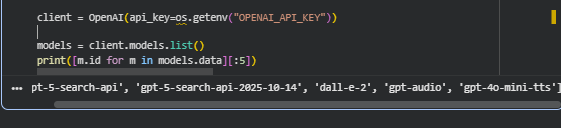

In [92]:
product_embeddings = product_embeddings / np.linalg.norm(product_embeddings, axis=1, keepdims=True)


**It finds products that “match the vibe” of your query and tells you if the match is weak.**

In [51]:
def vibe_match(query, top_k=3, threshold=0.35):
    """
    Finds top matching products based on 'vibe' similarity.
    Uses cosine similarity between query vector and product embeddings.
    """
    if not query.strip():
        return pd.DataFrame(), True

    q_vec = tfidf.transform([query]).toarray()
    q_vec = q_vec / (np.linalg.norm(q_vec) + 1e-12)
    sims = cosine_similarity(q_vec, product_embeddings)[0]
    top_idx = np.argsort(-sims)[:top_k]

    results = df.iloc[top_idx][['id', 'name', 'desc']].copy()
    results['similarity'] = sims[top_idx]
    fallback = sims[top_idx[0]] < threshold
    return results, fallback

In [52]:
queries = [
    "bold futuristic metallic streetwear",
    "earthy bohemian summer festival outfit",
    "luxury minimalist monochrome look",
    "retro 90s denim and grunge vibe",
    "pastel dreamy spring brunch dress",
    "professional smart casual office style",
    "edgy dark gothic aesthetic",
    "sporty chic athleisure weekend wear",
    "coastal light linen vacation outfit",
    "glamorous red carpet evening gown"
]


In [60]:


metrics = [] # as creating an empty list to store the results like latency and match quality for each queries

print("\n............QUERY TESTING......... \n")
for q in queries:
    start = time.time()
    results, fallback = vibe_match(q)
    end = time.time()

    if results.empty:
        print(f"Query '{q}' is empty or invalid.")
        continue

    latency = end - start
    avg_score = results['similarity'].mean()
    quality = "good" if results.iloc[0]['similarity'] > 0.7 else ("okay" if results.iloc[0]['similarity'] > 0.45 else "bad")

    metrics.append({
        "query": q,
        "top1": results.iloc[0]['name'],
        "score": round(results.iloc[0]['similarity'], 3),
        "avg_score": round(avg_score, 3),
        "latency_s": round(latency, 4),
        "quality": quality,
        "fallback": fallback
    })

    print(f"\n Query: {q}")
    print(results)
    if fallback:
        print(" Fallback: Confidence too low — ask user to refine style description (e.g., 'boho', 'chic', 'sporty').")

metrics_df = pd.DataFrame(metrics)
display(metrics_df)



............QUERY TESTING......... 


 Query: bold futuristic metallic streetwear
    id                  name  \
13  14  Techwear Windbreaker   
8    9    Street Cargo Pants   
1    2   Urban Bomber Jacket   

                                                 desc  similarity  
13  Water-resistant windbreaker with reflective st...    0.213640  
8   Loose-fit cargo pants in khaki — edgy streetwe...    0.167757  
1   Cropped bomber jacket in sleek black, designed...    0.162840  
 Fallback: Confidence too low — ask user to refine style description (e.g., 'boho', 'chic', 'sporty').

 Query: earthy bohemian summer festival outfit
    id             name                                               desc  \
0    1       Boho Dress  Flowy maxi dress, earthy tones, embroidered de...   
19  20  Floral Sundress  Light floral sundress with pastel prints — che...   
17  18     Denim Jacket  Classic denim jacket with vintage wash — adds ...   

    similarity  
0     0.429188  
19    0.156730  
1

,query,top1,score,avg_score,latency_s,quality,fallback
0,bold futuristic metallic streetwear,Techwear Windbreaker,0.214,0.181,0.0103,bad,True
1,earthy bohemian summer festival outfit,Boho Dress,0.429,0.245,0.0056,bad,False
2,luxury minimalist monochrome look,Velvet Blazer,0.238,0.226,0.0057,bad,True
3,retro 90s denim and grunge vibe,Vintage Floral Blouse,0.201,0.185,0.0049,bad,True
4,pastel dreamy spring brunch dress,Ruffled Skirt,0.202,0.182,0.0042,bad,True
5,professional smart casual office style,Oversized Blazer,0.477,0.271,0.0040,okay,False
6,edgy dark gothic aesthetic,Vintage Floral Blouse,0.251,0.214,0.0035,bad,True
7,sporty chic athleisure weekend wear,Pastel Hoodie,0.203,0.193,0.0036,bad,True
8,coastal light linen vacation outfit,Floral Sundress,0.202,0.196,0.0039,bad,True
9,glamorous red carpet evening gown,Boho Dress,0.000,0.000,0.0039,bad,True


visualize the efffects

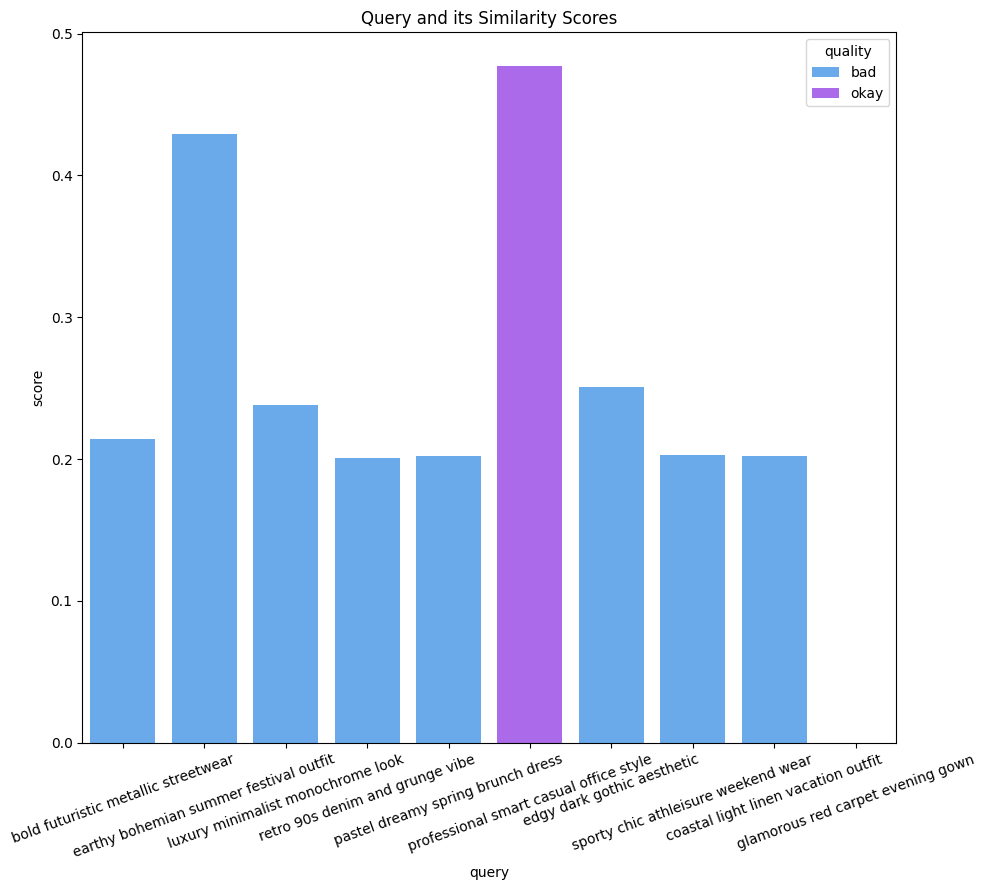

In [72]:
plt.figure(figsize=(10, 9))
sns.barplot(data=metrics_df, x='query', y='score', hue='quality', palette='cool')
plt.title("Query and its Similarity Scores")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


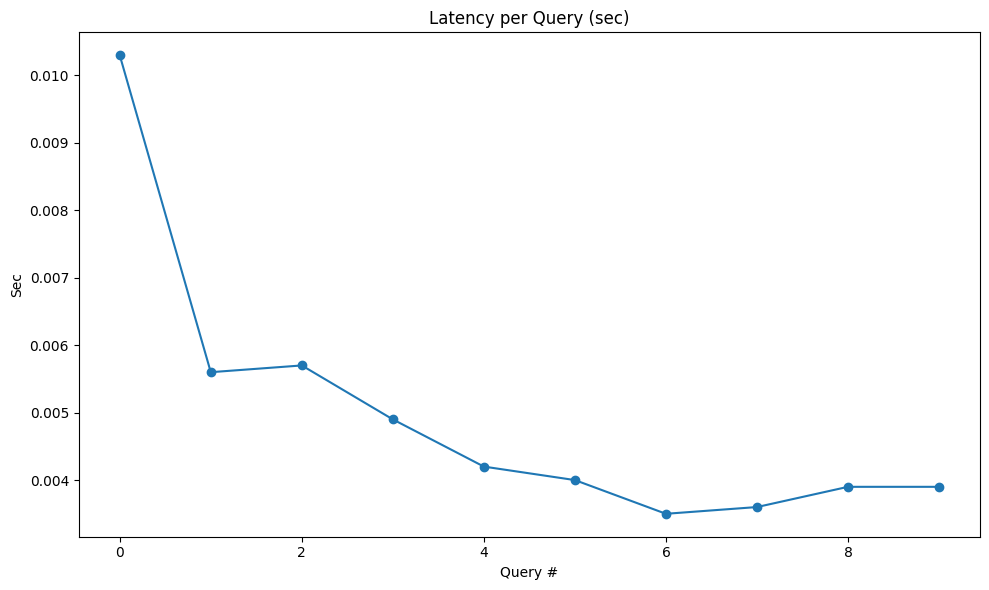

In [79]:

plt.figure(figsize=(10, 6))
plt.plot(metrics_df['latency_s'], marker='o')
plt.title("Latency per Query (sec)")
plt.ylabel("Sec")
plt.xlabel("Query #")
plt.tight_layout()
plt.show()

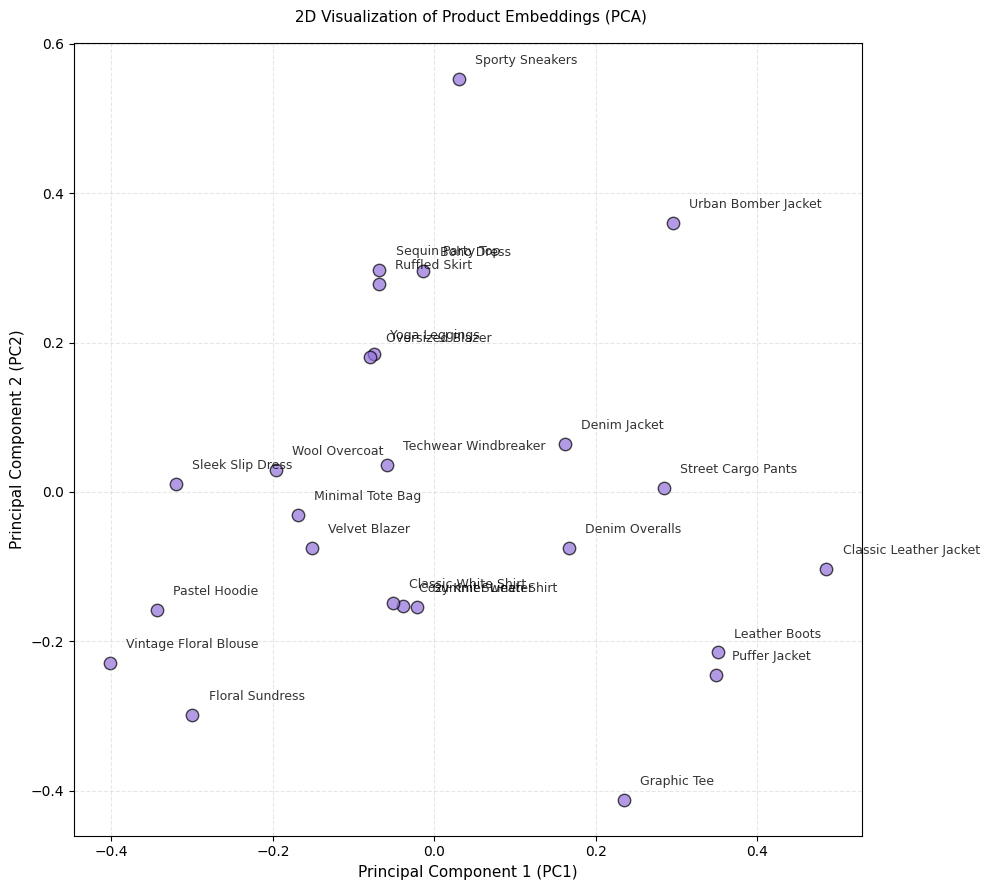

In [84]:
pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(product_embeddings)

plt.figure(figsize=(10, 9))
plt.scatter(reduced[:, 0], reduced[:, 1], color='mediumpurple', alpha=0.7, s=80, edgecolors='k')

for i, name in enumerate(df['name']):
    plt.text(
        reduced[i, 0] + 0.02, reduced[i, 1] + 0.02, name,
        fontsize=9, color='black', alpha=0.8
    )

plt.title(" 2D Visualization of Product Embeddings (PCA)", fontsize=11, pad=15)
plt.xlabel("Principal Component 1 (PC1)", fontsize=11)
plt.ylabel("Principal Component 2 (PC2)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [86]:
reflection = [
    "1️⃣ Upgrade TF-IDF to dense semantic embeddings (OpenAI, SBERT, or Gemini) to better capture subtle fashion 'vibes'.",
    "2️⃣ Integrate vector databases like Pinecone or Weaviate for faster and scalable similarity search.",
    "3️⃣ Implement multimodal learning using CLIP  blending text and image embeddings for richer visual-style recognition.",
    "4️⃣ Introduce adaptive learning from user behavior (clicks, favorites, purchases) to personalize recommendations over time.",
    "5️⃣ Expand to multilingual query understanding, making Nexora globally inclusive and culturally aware."
]

print("\n Reflections & Future Enhancements:\n")
for idea in reflection:
    print(f"* {idea}")



 Reflections & Future Enhancements:

* 1️⃣ Upgrade TF-IDF to dense semantic embeddings (OpenAI, SBERT, or Gemini) to better capture subtle fashion 'vibes'.
* 2️⃣ Integrate vector databases like Pinecone or Weaviate for faster and scalable similarity search.
* 3️⃣ Implement multimodal learning using CLIP  blending text and image embeddings for richer visual-style recognition.
* 4️⃣ Introduce adaptive learning from user behavior (clicks, favorites, purchases) to personalize recommendations over time.
* 5️⃣ Expand to multilingual query understanding, making Nexora globally inclusive and culturally aware.


In [87]:
for thought in reflection:
    print(f" {thought}")


 1️⃣ Upgrade TF-IDF to dense semantic embeddings (OpenAI, SBERT, or Gemini) to better capture subtle fashion 'vibes'.
 2️⃣ Integrate vector databases like Pinecone or Weaviate for faster and scalable similarity search.
 3️⃣ Implement multimodal learning using CLIP  blending text and image embeddings for richer visual-style recognition.
 4️⃣ Introduce adaptive learning from user behavior (clicks, favorites, purchases) to personalize recommendations over time.
 5️⃣ Expand to multilingual query understanding, making Nexora globally inclusive and culturally aware.


In [85]:
intro = (
    "At Nexora, we redefine online shopping through emotionaware AI. "
    "Instead of relying solely on keywords, our Vibe Matcher decodes human moods and style language — "
    "understanding the difference between 'urban edge', 'romantic vintage', or 'cozy elegance'. "
    "By transforming both product descriptions and user queries into high-dimensional embeddings, "
    "Nexora maps the emotional fingerprint of every item to deliver deeply personal, intuitive recommendations. "
    "Powered by OpenAI embeddings and scalable vector intelligence, Nexora brings art, emotion, and technology together "
    "to shape the future of human-centered eCommerce experiences."
)

print("\n Nexora Vision:\n", intro)



 Nexora Vision:
 At Nexora, we redefine online shopping through emotionaware AI. Instead of relying solely on keywords, our Vibe Matcher decodes human moods and style language — understanding the difference between 'urban edge', 'romantic vintage', or 'cozy elegance'. By transforming both product descriptions and user queries into high-dimensional embeddings, Nexora maps the emotional fingerprint of every item to deliver deeply personal, intuitive recommendations. Powered by OpenAI embeddings and scalable vector intelligence, Nexora brings art, emotion, and technology together to shape the future of human-centered eCommerce experiences.
